# ETL

### Imports

In [36]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dateutil import parser

## Leitura do Dataset e Análise Inicial

In [51]:
df = pd.read_csv('Material Hackathon/Base Dados Candidatos.csv', sep=';', encoding='ISO-8859-1')
df.head()

,ID,Nome,Critério,Tipo,Nota,Justificativa,DataAvaliacao
0,3000,pedro.henrique,"Ser ""team player""",Execução,NaN,"inovador, mas confuso","April 02, 2023"
1,3001,luiza.henrique,Atender Aos Prazos,EXECUÇÃO,"7,6",Boa Execução Com Erros Pontuais,"March 10, 2023"
2,3002,mariana.costa,Fazer Mais Com Menos,execução,Oito,"RESPONSÁVEL, PORÉM INSEGURO","April 18, 2023"
3,3003,,PENSAR FORA DA CAIXA,COMPORTAMENTAL,Seis,"trabalho em equipe precisa melhorar""""""",15/04/2023
4,3004,joana.silva,Resiliencia Nas Adversidades,Execução,Dez,"organizado, mas às vezes desatento",19.04.23


In [ ]:
print(df.dtypes)

ID                int64
Nome             object
Critério         object
Tipo             object
Nota             object
Justificativa    object
DataAvaliacao    object
dtype: object

In [4]:
df.shape

(1000, 7)

1000 instâncias

In [5]:
df.nunique()

ID               1000
Nome              201
Critério           36
Tipo                6
Nota               87
Justificativa      80
DataAvaliacao     294
dtype: int64

In [8]:
df.isna().sum()

ID                 0
Nome               0
Critério           0
Tipo               0
Nota             247
Justificativa      0
DataAvaliacao      0
dtype: int64

247 dados ausentes em coluna "Nota"

### Tratamento de dados

Trocando valores em nota:

In [10]:
df.Nota.unique()

array([nan, '7,6', 'Oito', 'Seis', 'Dez', '9,5', '7.1', '6.2', '8.4',
       'Sete', '6.5', 'Nove', '8,4', '9.7', '6.4', '6,1', '9,7', '9,3',
       '9,1', '6.9', '6.7', '6.6', '7.6', '9.8', '7,4', '7,7', '6,2',
       '6,6', '8.0', '9.0', '7.3', '8,6', '9.3', '8.9', '6.8', '8,9',
       '7.9', '6,5', '9.6', '7,9', '8,1', '8,5', '8.5', '8,2', '9,6',
       '9,9', '8,3', '7.5', '7.8', '8.2', '9,8', '7,2', '7.7', '7.0',
       '9.4', '7,5', '9.1', '7,1', '10.0', '9,0', '6,4', '8.3', '8,8',
       '8.8', '6,9', '7,0', '6.3', '9.2', '6,8', '9.9', '7.2', '9.5',
       '7.4', '10,0', '9,2', '8,0', '6,7', '6.1', '8.7', '7,8', '6,0',
       '8.1', '9,4', '8.6', '7,3', '6.0', '8,7', '6,3'], dtype=object)

In [52]:
# Substituições desejadas
substituicoes = {
    ',': '.',
    'Oito': '8.0',
    'Dez': '10.0',
    'Seis': '6.0',
    'Sete': '7.0',
    'Nove': '9.0'
}

df.Nota = df.Nota.replace(substituicoes, regex=True).astype('float')
df.Nota

0       NaN
1       7.6
2       8.0
3       6.0
4      10.0
       ... 
995     NaN
996     NaN
997     6.0
998     NaN
999     NaN
Name: Nota, Length: 1000, dtype: float64

---
Nome:

In [53]:
#df.Nome = df.Nome.replace({' ': ''}, regex=True)
df.Nome = df.Nome.apply(lambda x: x.replace(' ', '').replace('.', ' ').title())
df.Nome = df.Nome.replace({'': np.NAN})
print('missing values:', df.Nome.isna().sum())
df.Nome.unique()

missing values: 31


array(['Pedro Henrique', 'Luiza Henrique', 'Mariana Costa', nan,
       'Joana Silva', 'Ricardo Silva', 'Luiza Martins', 'Bruno Lima',
       'João Lima', 'Ricardo Martins', 'Carolina Mendes', 'Sofia Martins',
       'Ana Pereira', 'João Costa', 'Mariana Silva', 'Sofia Henrique',
       'Juliana Henrique', 'Clara Oliveira', 'Rafael Silva',
       'Ana Martins', 'Marcos Mendes', 'Carolina Henrique',
       'Carolina Martins', 'Sofia Oliveira', 'Pedro Martins',
       'Carolina Costa', 'Carlos Lima', 'Rafael Henrique', 'Maria Silva',
       'Marcos Costa', 'Juliana Pereira', 'Ana Henrique',
       'Fernanda Pereira', 'Sofia Costa', 'Eduardo Oliveira',
       'Mariana Mendes', 'Rafael Souza', 'Maria Mendes', 'Marcos Lima',
       'Bruno Henrique', 'Mateus Silva', 'Eduardo Ferreira',
       'Clara Costa', 'Juliana Costa', 'Carolina Pereira',
       'João Oliveira', 'Bruno Silva', 'Sofia Mendes', 'Rafael Martins',
       'Ricardo Souza', 'Ricardo Mendes', 'Mateus Costa', 'Ana Oliveira',
   

---
ID:

In [54]:
df['ID'] = df['ID'].astype('int')


In [55]:
df[df.Nome=='Marcos Lima']

,ID,Nome,Critério,Tipo,Nota,Justificativa,DataAvaliacao
43,3043,Marcos Lima,Resiliencia nas adversidades,COMPORTAMENTAL,NaN,"Reativo, falta proatividade",12.04.2023
49,3049,Marcos Lima,resiliencia nas adversidades,Comportamental,NaN,"cumpre prazos, mas sem iniciativa",03/may/23
203,3203,Marcos Lima,Entregar Com Qualidade,execução,6.4,TRABALHO EM EQUIPE PRECISA MELHORAR,07.05.23
224,3224,Marcos Lima,"SER ""TEAM PLAYER""",Execução,10.0,"Cumpre prazos, mas sem iniciativa""""""",03.05.2023
236,3236,Marcos Lima,fazer mais com menos,Comportamental,NaN,Boa execução com erros pontuais,15.03.2023
382,3382,Marcos Lima,atender aos prazos,Comportamental,NaN,"REATIVO, FALTA PROATIVIDADE","May 04, 2023"
632,3632,Marcos Lima,Capacidade De Aprender,Execução,8.2,"Responsável, porém inseguro",11.04.2023
635,3635,Marcos Lima,ATENDER AOS PRAZOS,Comportamental,8.5,"INOVADOR, MAS CONFUSO",30.04.23
738,3738,Marcos Lima,organização no trabalho,COMPORTAMENTAL,7.4,"cumpre prazos, mas sem iniciativa""""""",15/04/2023
998,3998,Marcos Lima,RESILIENCIA NAS ADVERSIDADES,Execução,NaN,"Organizado, mas às vezes desatento""""""",15/apr/23


In [56]:
df.Nome.value_counts()

Nome
Marcos Lima          10
Bruno Oliveira       10
Jorge Oliveira        9
Carolina Henrique     9
Carlos Henrique       9
                     ..
Joana Martins         1
Bruno Souza           1
Pedro Souza           1
Rafael Pereira        1
João Souza            1
Name: count, Length: 200, dtype: int64

---
DataAvaliacao:

In [57]:
df['DataAvaliacao'].unique()

array(['April 02, 2023', 'March 10, 2023', 'April 18, 2023', '15/04/2023',
       '19.04.23', '15/apr/23', '01.04.23', '31.03.2023', '10.04.23',
       '15.04.23', '13/apr/23', '04/may/23', '23.03.23', 'April 15, 2023',
       '08/04/2023', '21/04/2023', '28/mar/23', '01/apr/23', '13/03/2023',
       '16/03/2023', 'April 24, 2023', '16/04/2023', '08.04.23',
       '02.05.23', '30/mar/23', '03/04/2023', '07.05.23', '30.03.2023',
       'April 20, 2023', '16/apr/23', '03.04.2023', '22/apr/23',
       '01/04/2023', '21.03.2023', '01.05.2023', 'March 30, 2023',
       '23.04.2023', '24/apr/23', '29.03.23', '12.04.2023', '26/03/2023',
       '21.04.23', '07.04.23', '12.04.23', '03/may/23', '25.04.23',
       '27.04.23', '30.04.2023', '20/apr/23', '07.04.2023', '08/apr/23',
       '23/mar/23', '14.04.23', '28.03.23', 'April 28, 2023',
       '11.04.2023', '22.04.2023', '22.03.23', '29.04.23', '24.03.2023',
       'April 26, 2023', 'April 25, 2023', 'April 11, 2023', '19.03.23',
       '21/03

In [58]:
# Função para converter para datetime e formatar para dd/mm/aaaa
def parse_date(data_str):
    try:
        dt = parser.parse(data_str, dayfirst=True)
        return dt.strftime('%d/%m/%Y')
    except:
        return np.NAN

# Supondo que sua coluna seja df['data']
df['data_formatada'] = df['DataAvaliacao'].apply(parse_date)

In [59]:
df[['DataAvaliacao','data_formatada']].isna().sum()

DataAvaliacao     0
data_formatada    0
dtype: int64

In [62]:
df['DataAvaliacao'] = pd.to_datetime(df['data_formatada'], dayfirst=True)
df = df.drop(columns=['data_formatada'])

In [63]:
df

,ID,Nome,Critério,Tipo,Nota,Justificativa,DataAvaliacao
0,3000,Pedro Henrique,"Ser ""team player""",Execução,NaN,"inovador, mas confuso",2023-04-02
1,3001,Luiza Henrique,Atender Aos Prazos,EXECUÇÃO,7.6,Boa Execução Com Erros Pontuais,2023-03-10
2,3002,Mariana Costa,Fazer Mais Com Menos,execução,8.0,"RESPONSÁVEL, PORÉM INSEGURO",2023-04-18
3,3003,NaN,PENSAR FORA DA CAIXA,COMPORTAMENTAL,6.0,"trabalho em equipe precisa melhorar""""""",2023-04-15
4,3004,Joana Silva,Resiliencia Nas Adversidades,Execução,10.0,"organizado, mas às vezes desatento",2023-04-19
...,...,...,...,...,...,...,...
995,3995,Pedro Pereira,Resiliencia nas adversidades,Execução,NaN,"Organizado, mas às vezes desatento",2023-03-19
996,3996,Rafael Lima,"Ser ""team player""",Comportamental,NaN,"BOA EXECUÇÃO COM ERROS PONTUAIS""""""",2023-04-30
997,3997,NaN,Sentimento De Dono,COMPORTAMENTAL,6.0,"Responsável, porém inseguro",2023-03-16
998,3998,Marcos Lima,RESILIENCIA NAS ADVERSIDADES,Execução,NaN,"Organizado, mas às vezes desatento""""""",2023-04-15


---
Tipo:

In [67]:
df['Tipo'].unique()

array([' Execução', ' EXECUÇÃO', ' execução', ' COMPORTAMENTAL',
       ' Comportamental', ' comportamental'], dtype=object)

In [70]:
df['Tipo'] = df['Tipo'].apply(lambda x: x.replace(' ', '').title())
df['Tipo']

0            Execução
1            Execução
2            Execução
3      Comportamental
4            Execução
            ...      
995          Execução
996    Comportamental
997    Comportamental
998          Execução
999          Execução
Name: Tipo, Length: 1000, dtype: object

In [71]:
df['Tipo'].unique()

array(['Execução', 'Comportamental'], dtype=object)

---
Critério:

In [72]:
df['Critério'].unique()

array(['Ser "team player"', 'Atender Aos Prazos', 'Fazer Mais Com Menos',
       'PENSAR FORA DA CAIXA', 'Resiliencia Nas Adversidades',
       'RESILIENCIA NAS ADVERSIDADES', 'Entregar com qualidade',
       'Capacidade De Aprender', 'Sentimento De Dono',
       'ATENDER AOS PRAZOS', 'Organização no trabalho',
       'SENTIMENTO DE DONO', 'Atender aos prazos',
       'organização no trabalho', 'fazer mais com menos',
       'Fazer mais com menos', 'Ser "Team Player"',
       'ENTREGAR COM QUALIDADE', 'Resiliencia nas adversidades',
       'resiliencia nas adversidades', 'Organização No Trabalho',
       'ORGANIZAÇÃO NO TRABALHO', 'SER "TEAM PLAYER"',
       'Sentimento de dono', 'Pensar fora da caixa',
       'Pensar Fora Da Caixa', 'entregar com qualidade',
       'Entregar Com Qualidade', 'capacidade de aprender',
       'FAZER MAIS COM MENOS', 'Capacidade de aprender',
       'CAPACIDADE DE APRENDER', 'atender aos prazos',
       'pensar fora da caixa', 'sentimento de dono', 'ser "

In [75]:
df['Critério'] = df['Critério'].apply(lambda x: x.replace('"', '').capitalize())
df['Critério'].unique()

array(['Ser team player', 'Atender aos prazos', 'Fazer mais com menos',
       'Pensar fora da caixa', 'Resiliencia nas adversidades',
       'Entregar com qualidade', 'Capacidade de aprender',
       'Sentimento de dono', 'Organização no trabalho'], dtype=object)

In [76]:
df

,ID,Nome,Critério,Tipo,Nota,Justificativa,DataAvaliacao
0,3000,Pedro Henrique,Ser team player,Execução,NaN,"inovador, mas confuso",2023-04-02
1,3001,Luiza Henrique,Atender aos prazos,Execução,7.6,Boa Execução Com Erros Pontuais,2023-03-10
2,3002,Mariana Costa,Fazer mais com menos,Execução,8.0,"RESPONSÁVEL, PORÉM INSEGURO",2023-04-18
3,3003,NaN,Pensar fora da caixa,Comportamental,6.0,"trabalho em equipe precisa melhorar""""""",2023-04-15
4,3004,Joana Silva,Resiliencia nas adversidades,Execução,10.0,"organizado, mas às vezes desatento",2023-04-19
...,...,...,...,...,...,...,...
995,3995,Pedro Pereira,Resiliencia nas adversidades,Execução,NaN,"Organizado, mas às vezes desatento",2023-03-19
996,3996,Rafael Lima,Ser team player,Comportamental,NaN,"BOA EXECUÇÃO COM ERROS PONTUAIS""""""",2023-04-30
997,3997,NaN,Sentimento de dono,Comportamental,6.0,"Responsável, porém inseguro",2023-03-16
998,3998,Marcos Lima,Resiliencia nas adversidades,Execução,NaN,"Organizado, mas às vezes desatento""""""",2023-04-15


---
Justificativa:

In [79]:
df['Justificativa'].nunique()

80

In [80]:
df['Justificativa'].unique()

array(['inovador, mas confuso', 'Boa Execução Com Erros Pontuais',
       'RESPONSÁVEL, PORÉM INSEGURO',
       'trabalho em equipe precisa melhorar"""',
       'organizado, mas às vezes desatento',
       'reativo, falta proatividade',
       'ENTREGA CONSISTENTE, MAS FALTA COMUNICAÇÃO',
       'Criativo, porém pouco claro', 'Inovador, mas confuso',
       'reativo, falta proatividade"""',
       'Aprende rápido, mas esquece feedbacks',
       'Cumpre Prazos, Mas Sem Iniciativa', 'Criativo, Porém Pouco Claro',
       'TRABALHO EM EQUIPE PRECISA MELHORAR',
       'Aprende Rápido, Mas Esquece Feedbacks"""',
       'Organizado, mas às vezes desatento"""',
       'Entrega consistente, mas falta comunicação"""',
       'boa execução com erros pontuais"""',
       'Criativo, Porém Pouco Claro"""',
       'Trabalho Em Equipe Precisa Melhorar"""',
       'Aprende rápido, mas esquece feedbacks"""',
       'Entrega consistente, mas falta comunicação',
       'Boa execução com erros pontuais"""'

In [83]:
df['Justificativa'] = df['Justificativa'].apply(lambda x: x.replace('"', '').capitalize())
df['Justificativa'].unique()

array(['Inovador, mas confuso', 'Boa execução com erros pontuais',
       'Responsável, porém inseguro',
       'Trabalho em equipe precisa melhorar',
       'Organizado, mas às vezes desatento',
       'Reativo, falta proatividade',
       'Entrega consistente, mas falta comunicação',
       'Criativo, porém pouco claro',
       'Aprende rápido, mas esquece feedbacks',
       'Cumpre prazos, mas sem iniciativa'], dtype=object)

In [84]:
df

,ID,Nome,Critério,Tipo,Nota,Justificativa,DataAvaliacao
0,3000,Pedro Henrique,Ser team player,Execução,NaN,"Inovador, mas confuso",2023-04-02
1,3001,Luiza Henrique,Atender aos prazos,Execução,7.6,Boa execução com erros pontuais,2023-03-10
2,3002,Mariana Costa,Fazer mais com menos,Execução,8.0,"Responsável, porém inseguro",2023-04-18
3,3003,NaN,Pensar fora da caixa,Comportamental,6.0,Trabalho em equipe precisa melhorar,2023-04-15
4,3004,Joana Silva,Resiliencia nas adversidades,Execução,10.0,"Organizado, mas às vezes desatento",2023-04-19
...,...,...,...,...,...,...,...
995,3995,Pedro Pereira,Resiliencia nas adversidades,Execução,NaN,"Organizado, mas às vezes desatento",2023-03-19
996,3996,Rafael Lima,Ser team player,Comportamental,NaN,Boa execução com erros pontuais,2023-04-30
997,3997,NaN,Sentimento de dono,Comportamental,6.0,"Responsável, porém inseguro",2023-03-16
998,3998,Marcos Lima,Resiliencia nas adversidades,Execução,NaN,"Organizado, mas às vezes desatento",2023-04-15


### Missing values

---
Nome:

Foi decidido que era melhor remover os dados faltantes dos nomes, já que são relativamente poucos e difíceis de se inputar adequadamente.

In [86]:
df[df.Nome.isna()]

,ID,Nome,Critério,Tipo,Nota,Justificativa,DataAvaliacao
3,3003,NaN,Pensar fora da caixa,Comportamental,6.0,Trabalho em equipe precisa melhorar,2023-04-15
11,3011,NaN,Organização no trabalho,Comportamental,8.0,"Cumpre prazos, mas sem iniciativa",2023-05-04
29,3029,NaN,Resiliencia nas adversidades,Execução,10.0,"Reativo, falta proatividade",2023-04-16
73,3073,NaN,Entregar com qualidade,Execução,6.0,Trabalho em equipe precisa melhorar,2023-03-21
101,3101,NaN,Sentimento de dono,Execução,6.4,"Aprende rápido, mas esquece feedbacks",2023-04-13
108,3108,NaN,Atender aos prazos,Comportamental,NaN,"Aprende rápido, mas esquece feedbacks",2023-04-26
111,3111,NaN,Fazer mais com menos,Comportamental,7.8,"Reativo, falta proatividade",2023-04-12
146,3146,NaN,Atender aos prazos,Comportamental,9.6,"Organizado, mas às vezes desatento",2023-04-12
149,3149,NaN,Fazer mais com menos,Execução,6.0,Trabalho em equipe precisa melhorar,2023-03-11
153,3153,NaN,Pensar fora da caixa,Execução,NaN,"Reativo, falta proatividade",2023-03-20


In [90]:
df[df.Nome.isna()].Critério.value_counts()

Critério
Pensar fora da caixa            7
Fazer mais com menos            7
Sentimento de dono              5
Resiliencia nas adversidades    3
Atender aos prazos              3
Ser team player                 2
Capacidade de aprender          2
Organização no trabalho         1
Entregar com qualidade          1
Name: count, dtype: int64

In [87]:
df[df.Nome=='Marcos Lima']

,ID,Nome,Critério,Tipo,Nota,Justificativa,DataAvaliacao
43,3043,Marcos Lima,Resiliencia nas adversidades,Comportamental,NaN,"Reativo, falta proatividade",2023-04-12
49,3049,Marcos Lima,Resiliencia nas adversidades,Comportamental,NaN,"Cumpre prazos, mas sem iniciativa",2023-05-03
203,3203,Marcos Lima,Entregar com qualidade,Execução,6.4,Trabalho em equipe precisa melhorar,2023-05-07
224,3224,Marcos Lima,Ser team player,Execução,10.0,"Cumpre prazos, mas sem iniciativa",2023-05-03
236,3236,Marcos Lima,Fazer mais com menos,Comportamental,NaN,Boa execução com erros pontuais,2023-03-15
382,3382,Marcos Lima,Atender aos prazos,Comportamental,NaN,"Reativo, falta proatividade",2023-05-04
632,3632,Marcos Lima,Capacidade de aprender,Execução,8.2,"Responsável, porém inseguro",2023-04-11
635,3635,Marcos Lima,Atender aos prazos,Comportamental,8.5,"Inovador, mas confuso",2023-04-30
738,3738,Marcos Lima,Organização no trabalho,Comportamental,7.4,"Cumpre prazos, mas sem iniciativa",2023-04-15
998,3998,Marcos Lima,Resiliencia nas adversidades,Execução,NaN,"Organizado, mas às vezes desatento",2023-04-15


In [95]:
df = df.dropna(subset=['Nome'])
df.isna().any()

ID               False
Nome             False
Critério         False
Tipo             False
Nota              True
Justificativa    False
DataAvaliacao    False
dtype: bool

---
Nota:

Foi decidido inputar os valores faltantes usando KNNInputer do scikit-learn

In [99]:
from sklearn.impute import KNNImputer

In [100]:
df.Nota.describe()

count    730.000000
mean       8.072192
std        1.260297
min        6.000000
25%        7.000000
50%        8.000000
75%        9.100000
max       10.000000
Name: Nota, dtype: float64

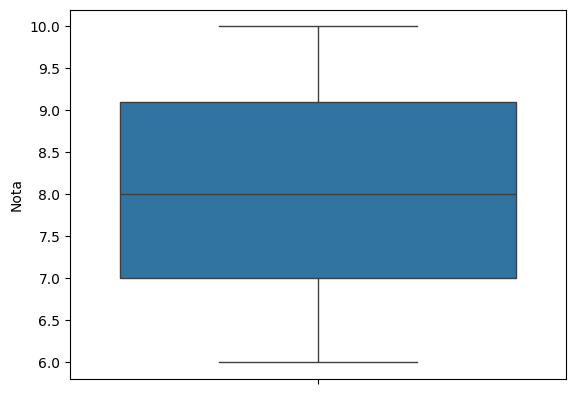

In [108]:
sns.boxplot(df['Nota'])
plt.show()

C:\Users\pedro\AppData\Local\Temp\ipykernel_23180\1498318572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, y='Nota', x='Critério', palette=sns.color_palette()[:9])


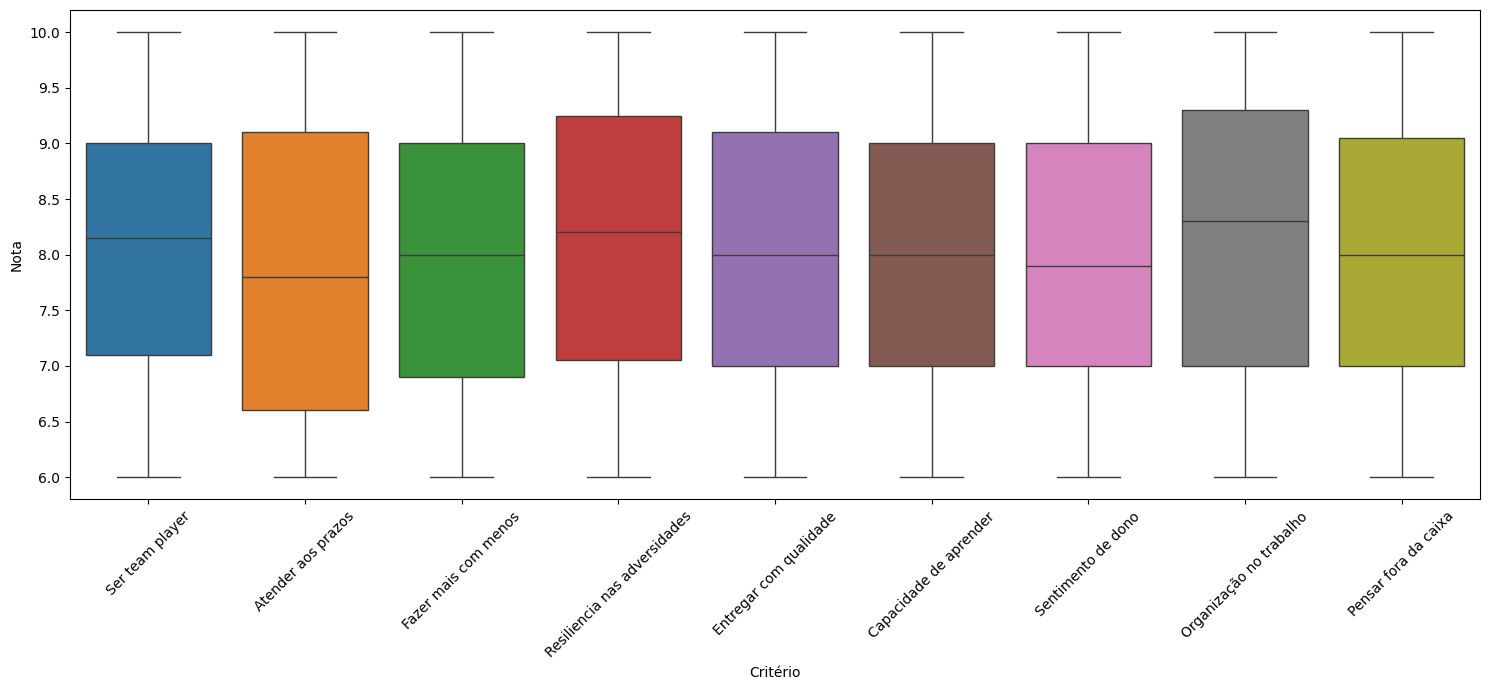

In [133]:
plt.figure(figsize=(15,7))
sns.boxplot(df, y='Nota', x='Critério', palette=sns.color_palette()[:9])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [143]:
df[['Critério', 'Nota']].groupby(by='Critério').aggregate(['mean', 'median','std'])

Nota                 
                                  mean median       std
Critério                                               
Atender aos prazos            7.846154   7.80  1.303610
Capacidade de aprender        8.054545   8.00  1.225521
Entregar com qualidade        8.002083   8.00  1.349306
Fazer mais com menos          7.928395   8.00  1.251523
Organização no trabalho       8.157303   8.30  1.293945
Pensar fora da caixa          8.100000   8.00  1.253775
Resiliencia nas adversidades  8.249495   8.20  1.237127
Sentimento de dono            8.068493   7.90  1.254091
Ser team player               8.162821   8.15  1.161292

In [140]:
df[['Critério', 'Nota']]

,Critério,Nota
0,Ser team player,NaN
1,Atender aos prazos,7.6
2,Fazer mais com menos,8.0
4,Resiliencia nas adversidades,10.0
5,Resiliencia nas adversidades,8.0
...,...,...
994,Resiliencia nas adversidades,6.6
995,Resiliencia nas adversidades,NaN
996,Ser team player,NaN
998,Resiliencia nas adversidades,NaN


In [145]:
#teste = df.copy()
df['Nota'] = df['Nota'].fillna(
    df.groupby('Critério')['Nota'].transform('median')
)
df[['Critério', 'Nota']]

C:\Users\pedro\AppData\Local\Temp\ipykernel_23180\1088832201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nota'] = df['Nota'].fillna(


,Critério,Nota
0,Ser team player,8.15
1,Atender aos prazos,7.60
2,Fazer mais com menos,8.00
4,Resiliencia nas adversidades,10.00
5,Resiliencia nas adversidades,8.00
...,...,...
994,Resiliencia nas adversidades,6.60
995,Resiliencia nas adversidades,8.20
996,Ser team player,8.15
998,Resiliencia nas adversidades,8.20


In [147]:
df[['Critério', 'Nota']].groupby(by='Critério').aggregate(['mean', 'median','std'])

Nota                 
                                  mean median       std
Critério                                               
Atender aos prazos            7.831579   7.80  1.075873
Capacidade de aprender        8.043902   8.00  1.098045
Entregar com qualidade        8.001818   8.00  1.259677
Fazer mais com menos          7.950000   8.00  1.044364
Organização no trabalho       8.192373   8.30  1.123879
Pensar fora da caixa          8.078302   8.00  1.108753
Resiliencia nas adversidades  8.237692   8.20  1.078491
Sentimento de dono            8.020588   7.90  1.061601
Ser team player               8.159091   8.15  0.976071

métricas praticamente não mudaram.

In [157]:
#teste = df.copy()
df = df.set_index('ID')
df

,Nome,Critério,Tipo,Nota,Justificativa,DataAvaliacao
ID,,,,,,
3000,Pedro Henrique,Ser team player,Execução,8.15,"Inovador, mas confuso",2023-04-02
3001,Luiza Henrique,Atender aos prazos,Execução,7.60,Boa execução com erros pontuais,2023-03-10
3002,Mariana Costa,Fazer mais com menos,Execução,8.00,"Responsável, porém inseguro",2023-04-18
3004,Joana Silva,Resiliencia nas adversidades,Execução,10.00,"Organizado, mas às vezes desatento",2023-04-19
3005,Ricardo Silva,Resiliencia nas adversidades,Execução,8.00,"Reativo, falta proatividade",2023-04-15
...,...,...,...,...,...,...
3994,Fernanda Oliveira,Resiliencia nas adversidades,Comportamental,6.60,"Organizado, mas às vezes desatento",2023-03-31
3995,Pedro Pereira,Resiliencia nas adversidades,Execução,8.20,"Organizado, mas às vezes desatento",2023-03-19
3996,Rafael Lima,Ser team player,Comportamental,8.15,Boa execução com erros pontuais,2023-04-30


In [158]:
df.to_csv('database.csv', encoding='utf-8')

In [151]:
df.to_json('database.json', orient='records',lines=True)

In [162]:
print(df.dtypes)

Nome                     object
Critério                 object
Tipo                     object
Nota                    float64
Justificativa            object
DataAvaliacao    datetime64[ns]
dtype: object
